## Import Dependencies

In [1]:
import atoti
import pandas as pd
import time

In [3]:
#!pip install fsspec s3fs 

## Load Data Into Pandas DataFrame from CSV

In [28]:
# Load credit card transaction data (2.2 GB) and calculate time to load
start_time = time.time()
cc_sales_df = pd.read_csv('s3://data.atoti.io/notebooks/retail-banking/credit_card_transactions_ibm.csv')
print("--- %s seconds ---" % (time.time() - start_time))

--- 2037.7230410575867 seconds ---


In [ ]:
cc_sales_df.head()

In [26]:
# Load credit card transaction data (265.5 MB) and calculate time to load
start_time = time.time()
cc_sales_df_gzip = pd.read_csv('s3://data.atoti.io/notebooks/retail-banking/credit_card_transactions_ibm.csv.gz', compression='gzip')
print("--- %s seconds ---" % (time.time() - start_time))

--- 376.6416630744934 seconds ---


In [30]:
# Start an Atoti Server instance
session = atoti.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"],
)
session.link

Closing existing "Unnamed" session to create the new one.


http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

In [31]:
# Load Pandas DataFrame as Atoti Table object
cc_sales_table = session.read_pandas(
    cc_sales_df, table_name="cc_sales_df"
)
cc_sales_table.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,N/A,No
1,0,0,2002,9,4,05:51,$93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,N/A,No
2,0,0,2002,9,6,06:16,$110.37,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,N/A,No
3,0,0,2002,9,12,06:50,$52.52,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,N/A,No
4,0,0,2002,9,19,06:25,$168.11,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,N/A,No


In [32]:
# Load Pandas DataFrame as Atoti Table object
cc_info_table = session.read_pandas(
    cc_df, table_name="cc_df"
)
cc_info_table.head()

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,6,1,Mastercard,Credit,5089768442116305,07/2023,686,YES,2,$11200,09/2010,2010,No
2,9,0,Mastercard,Debit,5294178176133532,07/2024,265,YES,2,$9496,07/2009,2012,No
3,15,3,Mastercard,Debit,5231462717450524,03/2024,754,YES,2,$12082,08/2016,2016,No
4,16,4,Visa,Debit,4795724941278913,02/2022,136,YES,2,$14548,08/2007,2013,No


In [35]:
# Load Pandas DataFrame as Atoti Table object
cc_users_table = session.read_pandas(
    users_df, table_name="users_df"
)
cc_users_table.head()

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,<NA>,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,38,Simon Adams,46,70,1973,10,Male,9344 Mill Drive,<NA>,Seaside,CA,93955,36.62,-121.82,$18663,$38054,$63293,666,1
2,43,Leslie Myers,26,52,1994,1,Female,613 Little Creek Lane,848.0,Immokalee,FL,34142,26.41,-81.42,$10819,$22066,$38967,842,1
3,59,Princess Cooper,41,66,1979,2,Female,2079 Maple Drive,<NA>,Mount Union,PA,17066,40.38,-77.88,$14650,$29864,$44902,717,2
4,84,Juliette Howard,54,70,1965,9,Female,393 Mountain View Lane,<NA>,Newport Coast,CA,92657,33.6,-117.82,$96516,$196784,$437533,729,3


In [36]:
cc_sales_table.join(cc_info_table, cc_sales_table["User"] == cc_info_table["User"])
cc_sales_table.join(cc_users_table, cc_sales_table["User"] == cc_users_table["User"])

In [37]:
# Create Cube from Atoti Table object
cube = session.create_cube(cc_sales_table)

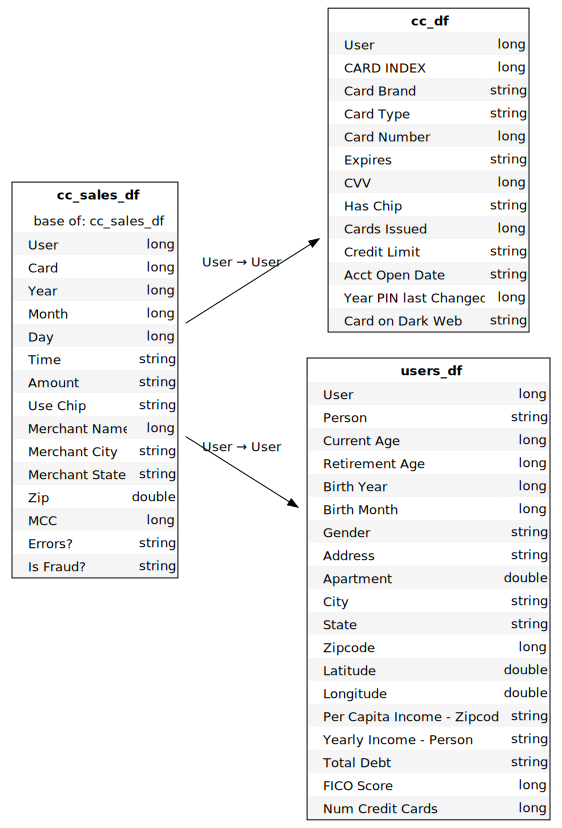

In [38]:
# View the schema
session.tables.schema

In [27]:
cc_sales_df_gzip.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [22]:
# Load credit card info data
cc_df = pd.read_csv('s3://data.atoti.io/notebooks/retail-banking/sd254_cards.csv')
cc_df.head(n=20)

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
5,1,0,Visa,Credit,4404898874682993,09/2003,736,YES,1,$27500,09/2003,2012,No
6,1,1,Visa,Debit,4001482973848631,07/2022,972,YES,2,$28508,02/2011,2011,No
7,1,2,Mastercard,Debit,5627220683410948,06/2022,48,YES,2,$9022,07/2003,2015,No
8,1,3,Mastercard,Debit (Prepaid),5711382187309326,11/2020,722,YES,2,$54,06/2010,2015,No
9,1,4,Mastercard,Debit (Prepaid),5766121508358701,02/2023,908,YES,1,$99,07/2006,2012,No


In [ ]:
for user in cc_df:
    print(user)

In [4]:
unique_values = cc_df['Card Brand'].unique()
print(sorted(unique_values))

['Amex', 'Discover', 'Mastercard', 'Visa']


In [5]:
cc_df.groupby(['Card Brand', 'Card Type']).size()

Card Brand  Card Type      
Amex        Credit              402
Discover    Credit              209
Mastercard  Credit              635
            Debit              2191
            Debit (Prepaid)     383
Visa        Credit              811
            Debit              1320
            Debit (Prepaid)     195
dtype: int64

<Axes: ylabel='Frequency'>

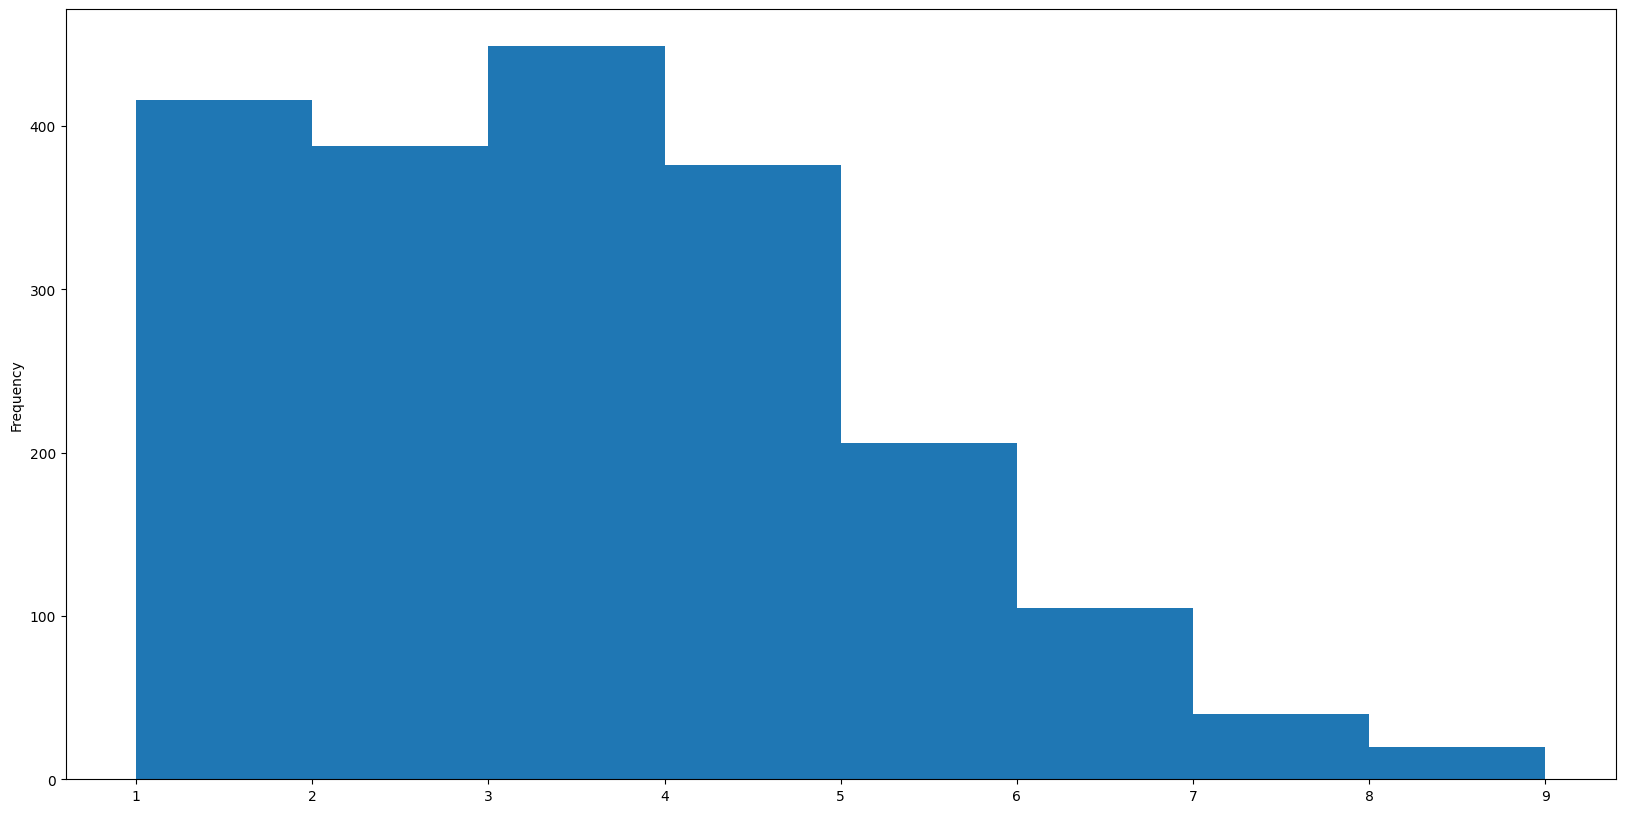

In [22]:
cc_df.groupby(['User'])['User'].count().plot(kind='hist', figsize=(20,10), bins=8)

<Axes: xlabel='User'>

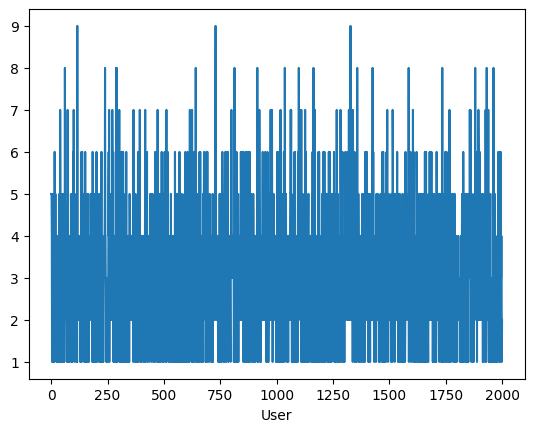

In [15]:
cc_df.groupby(['User'])['User'].count().plot()

In [34]:
# Load user data
users_df = pd.read_csv('s3://data.atoti.io/notebooks/retail-banking/sd254_users.csv')
users_df = users_df.rename_axis('User').reset_index()
users_df

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1
